## Linear Regression - Paradigma Probabilistik

Ingat kembali model regresi linear:
$$
f_\mathbf{w}(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b
$$

yang apabila diberikan dataset $\{ \mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^n$ parameter optimum $\mathbf{\hat{w}}$ dapat dicari via *least square optimization*. 

Model regresi linear mengasumsikan relasi antara input $\mathbf{x}$ dan output $y$ bersifat linear. 
Dalam padangan probabilitik, ada asumsi lain yang ditambahkan yaitu adanya *noise* $\epsilon$ antara input dan output:

$$
y^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} + b + \epsilon^{(i)}
$$

dimana $\epsilon$ berasal dari distribusi Gaussian/normal.

Sifat-sifat yang harus terpenuhi terkait *noise* $\epsilon$ adalah

1. Unbiased: $\mathbb{E}[\epsilon^{(i)}] = 0$
2. Error independent: $\mathbb{E}[\epsilon^{(i)} \epsilon^{(j)}] = \mathbb{E}[\epsilon^{(i)}] \mathbb{E}[\epsilon^{(j)}]$

### Fungsi Distribusi Gaussian / Normal

Fungsi distribusi probabilitas

$$
\mathcal{N}(z; \mu, \sigma) = P(z; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left( - \frac{(z - \mu)^2}{2 \sigma^2}\right)}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define probability density function for gaussian distribution
gaussian = lambda z, mu, sigma: 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((z - mu) / sigma) ** 2)

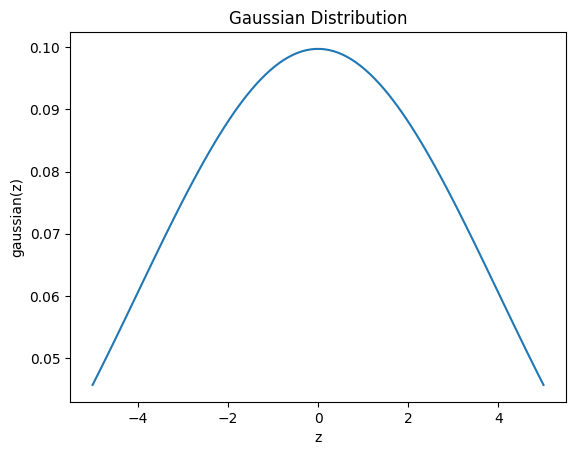

In [6]:
z = np.linspace(-5, 5, 100)
mu = 0
sigma = 4

f = gaussian(z, mu, sigma)

# Plot the gaussian distribution
plt.title("Gaussian Distribution")
plt.xlabel("z")
plt.ylabel("gaussian(z)")
plt.plot(z, f)

### Sampel dari Distribusi Normal

In [14]:
# Generate 1D samples
s = np.random.normal(mu, sigma, 1000000)

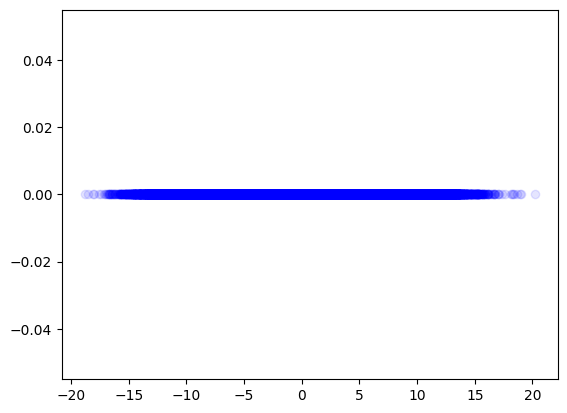

In [15]:
# Plot the samples in 1D
plt.scatter(s, np.zeros_like(s), alpha=0.1, color="blue")

(array([2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00,
        9.0000e+00, 1.1000e+01, 1.4000e+01, 2.1000e+01, 3.2000e+01,
        5.1000e+01, 6.5000e+01, 1.0300e+02, 1.2500e+02, 1.7400e+02,
        2.3500e+02, 3.2400e+02, 4.3600e+02, 5.9700e+02, 8.2000e+02,
        9.6600e+02, 1.3000e+03, 1.7420e+03, 2.0880e+03, 2.7060e+03,
        3.3250e+03, 4.0910e+03, 5.1650e+03, 6.1660e+03, 7.5430e+03,
        8.7380e+03, 1.0495e+04, 1.2211e+04, 1.3940e+04, 1.5908e+04,
        1.8072e+04, 2.0148e+04, 2.2529e+04, 2.4764e+04, 2.7383e+04,
        2.9649e+04, 3.1636e+04, 3.3129e+04, 3.5181e+04, 3.7034e+04,
        3.7856e+04, 3.8084e+04, 3.8553e+04, 3.8698e+04, 3.8475e+04,
        3.7897e+04, 3.6991e+04, 3.5810e+04, 3.4086e+04, 3.2157e+04,
        3.0246e+04, 2.8073e+04, 2.5870e+04, 2.3548e+04, 2.1012e+04,
        1.8710e+04, 1.6622e+04, 1.4678e+04, 1.2844e+04, 1.0836e+04,
        9.2020e+03, 7.9100e+03, 6.6750e+03, 5.3270e+03, 4.3940e+03,
        3.6650e+03, 2.9030e+03, 2.3830e+03, 1.80

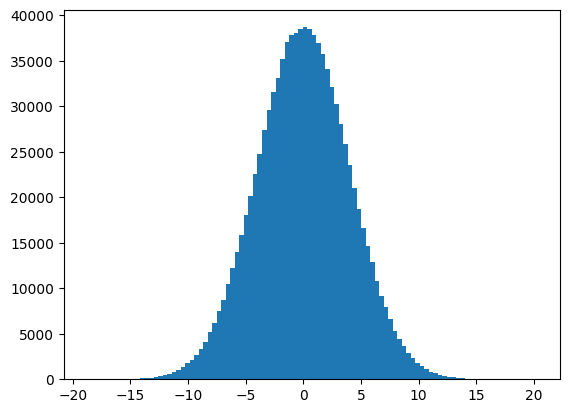

In [16]:
# Plot the histogram of the samples
plt.hist(s, bins=100)

In [17]:
# Generate 2D samples
s = np.random.normal(mu, sigma, (1000, 2))

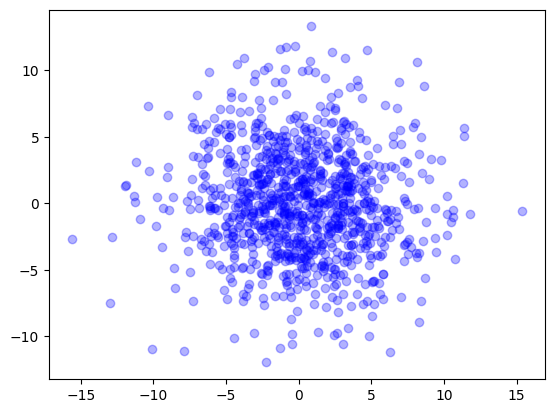

In [18]:
plt.scatter(s[:, 0], s[:, 1], alpha=0.3, color="blue")

### Fungsi Linear Probabilistik (dengan Gaussian Noise)

In [19]:
# Linear function
f_lin = lambda x, w: w[1] * x + w[0]

In [20]:
# Generate 1D samples
x = np.linspace(0, 5, 20)
w = np.array([0.3, 4.5])

mu = 0
sigma = 1.5
eps = np.random.normal(mu, sigma, len(x))
print(eps)

s = f_lin(x, w)

y = s + eps
print(y)

[ 2.37822505  0.30120109 -0.38221584 -3.00799933 -1.14071229 -0.93742409
 -2.47457308  0.42724859  2.16135881  0.96049434 -0.84141219  2.49041383
 -1.06928641  0.27281757 -2.17030122  0.69071277 -0.00993371 -2.28312629
  1.31437558 -2.65300305]
[ 2.67822505  1.78541162  2.28620521  0.84463224  3.89612981  5.28362854
  4.93069008  9.01672227 11.93504302 11.91838908 11.30069307 15.81672962
 13.44123991 15.96755442 14.70864614 18.75387067 19.23743471 18.14845266
 22.93016506 20.14699695]


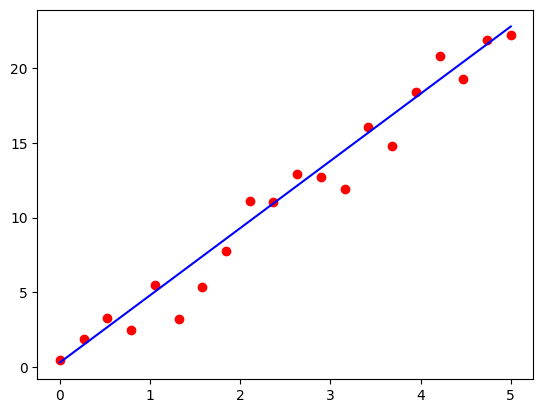

In [11]:
# Plot probabilistic linear function
plt.plot(x, s, color="blue")
plt.scatter(x, y, color="red")

### Maximum Likelihood Estimation
Dengan asumsi $\epsilon \sim \mathcal{N}(0, \sigma^2)$, kita dapatkan fungsi probabilitas kondisional (conditional probability) dari $y$ diketahui $\mathbf{x}$, yang juga dalam bentuk distribusi normal:

$$
P(y | \mathbf{x}; \mathbf{w}) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left( - \frac{(y - \mathbf{w}^\top \mathbf{x})^2}{2 \sigma^2}\right)}
$$

Diberikan $n$ data: $\{ \mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^n$ yang bersifat i.i.d. (*independent and identically distributed*), kita ingin mencari parameter $\mathbf{w}$ sehingga fungsi distribusi normal tersebut dapat disesuaikan terhadap data observasi.

#### Fungsi likelihood dan log-likehood
Untuk dapat mencari $\mathbf{w}$, perlu didefinisikan fungsi *likelihood*, yaitu probabilitas gabungan dari seluruh sampel terobservasi yang dilihat sebagai fungsi dari parameter model. 
Dikarenakan asumsi *i.i.d.*, fungsi *likelihood* untuk seluruh $\{ \mathbf{x}^{(i)}, y^{(i)}\}_{i=1}^n$:

$$
\mathcal{L}(\mathbf{w}) = \prod_{i=1}^n P(y^{(i)} | \mathbf{x}^{(i)}; \mathbf{w}) 
= \prod_{i=1}^n \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left(- \frac{(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)})^2 }{2 \sigma^2} \right)}
$$

Menghitung fungsi di atas dalam bentuk multiplikasi cukup sulit. Salah satu trik yang digunakan adalah menggunakan logaritma $\log$ untuk menkonversi perkalian ke penjumlahan, sehingga menghasilkan fungsi yang dinamakan *log-likelihood*:

$$
\log{\mathcal{L}(\mathbf{w})} = \frac{n}{\sigma \sqrt{2 \pi}} - \sum_{i=1}^n \frac{(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)})^2 }{2 \sigma^2} 
$$

Maximum likelihood estimation (MLE) berarti mencari parameter $\mathbf{w}$ yang memaksimalkan fungsi log likelihood:
$$
\mathbf{w} := \arg \max_{\mathbf{w}} \log{\mathcal{L}(\mathbf{w})}
$$

Dapat dilihat bahwa besaran pertama pada fungsi log-likelihood tidak bergantung nilai parameter $\mathbf{w}$. 
Dengan demikian MLE di atas dapat ditulis sebagai

$$
\arg \max_{\mathbf{w}} - \sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)})^2
$$

Interpretasi lain yang equivalen dengan pernyataan tersebut yaitu dengan meminimalkan nilai negatif dari fungsi log-likelihood:

$$
\arg \min \sum_{i=1}^n (y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)})^2
$$

yang tidak lain merupakan optimisasi least squares (LS)!